In [1]:
import json
import random

In [2]:
#Establising Connections on blockchain

In [3]:
#Connection to Blockchain
from web3 import Web3
web3 = Web3(Web3.HTTPProvider('HTTP://127.0.0.1:7545'))
print("isConnected:",web3.isConnected())

#gettin lists of accounts available, Account[0] will be like an auditor account
accounts_list = web3.eth.accounts
for i in accounts_list:
    print(i)

isConnected: True
0x31A64c190FDb775bD359A947940927c5E09F8820
0x1002FC159A99EaABD6BAAe7912a897a206E2F52D
0x27eC4aD50962bd4934CbAa591322e55120581dE8
0x0a03D961361baaEa4Ab50d1A1e86F94cF571C664
0x00CC9e2E488621AcE2999EE6312d77A7B30eF4dc


In [4]:
#from index 1 to index 4, they will represent each GRID, so mapping them to regions A1, A2, A3, A4 resp.
GRID_accounts = {}
GRID_connections = set()

#Making Dictionary
for i in range(1,len(accounts_list)):
    GRID_accounts['A'+str(i)] = accounts_list[i]
print(GRID_accounts)
print()
#Printing then sequence wise
for k, v in GRID_accounts.items():
    print(k,':',v)


{'A1': '0x1002FC159A99EaABD6BAAe7912a897a206E2F52D', 'A2': '0x27eC4aD50962bd4934CbAa591322e55120581dE8', 'A3': '0x0a03D961361baaEa4Ab50d1A1e86F94cF571C664', 'A4': '0x00CC9e2E488621AcE2999EE6312d77A7B30eF4dc'}

A1 : 0x1002FC159A99EaABD6BAAe7912a897a206E2F52D
A2 : 0x27eC4aD50962bd4934CbAa591322e55120581dE8
A3 : 0x0a03D961361baaEa4Ab50d1A1e86F94cF571C664
A4 : 0x00CC9e2E488621AcE2999EE6312d77A7B30eF4dc


In [5]:
'''
These are two functions which will be used to establish/destablish connection between GRID, 
based on this we will add/remove connection in GRID)connections e.g. A1-A2, A1-A3, etc. 

And also it will be used to transact on the blockchain, which will record the connections and disconnections
'''

def establish_connection(from_,to_):
    
    #adding connections to GRID_connections set.
    try:
        GRID_connections.add(from_ +'-'+ to_)    
        #Interacting with blockchain to transact (enableConnections).
        contract_MappingAddressConnection.functions.enableConnections(from_,to_).transact({'from':accounts_list[0]})
        return "Connection Establihed"
    except :
        return "Connection Already Exists"
        #later try except Exception as error to read from response
        
def destablish_connection(from_,to_):
    #removing connections from GRID_connections set.
    
    try:
        GRID_connections.remove(from_ +'-'+ to_)
        #Interacting with blockchain to transact.
        contract_MappingAddressConnection.functions.disableConnections(from_,to_).transact({'from':accounts_list[0]})
        return "Connection Destablished"
    except :
        return "No connection exists to disconnect"

In [14]:
#First CONTRACT Deployment
with open('build/contracts/MappingAddressConnection.json') as f:
  first_migration = json.load(f)

first_migration_contract_address = first_migration['networks']['5777']['address']
first_migration_abi = first_migration['abi']
contract_MappingAddressConnection = web3.eth.contract(address=first_migration_contract_address, abi = first_migration_abi)

In [15]:
#Adding connections
print(establish_connection(GRID_accounts['A1'],GRID_accounts['A2']))
print(establish_connection(GRID_accounts['A1'],GRID_accounts['A3']))
print(establish_connection(GRID_accounts['A2'],GRID_accounts['A1']))
print(establish_connection(GRID_accounts['A2'],GRID_accounts['A4']))
print(establish_connection(GRID_accounts['A3'],GRID_accounts['A1']))
print(establish_connection(GRID_accounts['A3'],GRID_accounts['A4']))
print(establish_connection(GRID_accounts['A4'],GRID_accounts['A2']))
print(establish_connection(GRID_accounts['A4'],GRID_accounts['A3']))

Connection Establihed
Connection Establihed
Connection Establihed
Connection Establihed
Connection Establihed
Connection Establihed
Connection Establihed
Connection Establihed


In [16]:
# #Removing Connection
# print(destablish_connection(GRID_accounts['A1'],GRID_accounts['A2']))
# print(destablish_connection(GRID_accounts['A1'],GRID_accounts['A3']))
# print(destablish_connection(GRID_accounts['A2'],GRID_accounts['A1']))
# print(destablish_connection(GRID_accounts['A2'],GRID_accounts['A4']))
# print(destablish_connection(GRID_accounts['A3'],GRID_accounts['A1']))
# print(destablish_connection(GRID_accounts['A3'],GRID_accounts['A4']))
# print(destablish_connection(GRID_accounts['A4'],GRID_accounts['A2']))
# print(destablish_connection(GRID_accounts['A4'],GRID_accounts['A3']))

### Part 2 : Sending arbitraty values among grid

### 2.1. Importing Values from CSV

In [17]:
import pandas as pd

In [18]:
A1_A2 = pd.read_csv('../Seperated_Excel_WD/A1_A2.csv', header=None)
A1_A3 = pd.read_csv('../Seperated_Excel_WD/A1_A3.csv', header=None)
A2_A1 = pd.read_csv('../Seperated_Excel_WD/A2_A1.csv', header=None)
A2_A4 = pd.read_csv('../Seperated_Excel_WD/A2_A4.csv', header=None)
A3_A1 = pd.read_csv('../Seperated_Excel_WD/A3_A1.csv', header=None)
A3_A4 = pd.read_csv('../Seperated_Excel_WD/A3_A4.csv', header=None)
A4_A2 = pd.read_csv('../Seperated_Excel_WD/A4_A2.csv', header=None)
A4_A3 = pd.read_csv('../Seperated_Excel_WD/A4_A3.csv', header=None)

In [19]:
def dataFrame_to_Dict(data):
    #data_dictionary = {}
    data_list = []
    for i,j in data.iteritems():
        dict_j = []
        for z in j:
            dict_j.append(str(z))
        #data_dictionary[str(i)] = dict_j
        data_list.append(dict_j)
    #return data_dictionary
    return data_list

In [20]:
#interating through data and putting in dictionary
data_A1_A2 = dataFrame_to_Dict(A1_A2)
data_A1_A3 = dataFrame_to_Dict(A1_A3)
data_A2_A1 = dataFrame_to_Dict(A2_A1)
data_A2_A4 = dataFrame_to_Dict(A2_A4)
data_A3_A1 = dataFrame_to_Dict(A3_A1)
data_A3_A4 = dataFrame_to_Dict(A3_A4)
data_A4_A2 = dataFrame_to_Dict(A4_A2)
data_A4_A3 = dataFrame_to_Dict(A4_A3)

# #Printing then sequence wise
# for k, v in data_A2_A1.items():
#     print(k,':',v)

In [21]:
#Data connection set:
GRID_Connections = {'A1_A2' : data_A1_A2,
                    'A1_A3' : data_A1_A3,
                    'A2_A1' : data_A2_A1,
                    'A2_A4' : data_A2_A4,
                    'A3_A1' : data_A3_A1,
                    'A3_A4' : data_A3_A4,
                    'A4_A2' : data_A4_A2,
                    'A4_A3' : data_A4_A3
                   }

# #Printing then sequence wise
# for k, v in GRID_Connections.items():
#     print(k,':',v)
#     print()

In [23]:
#Second CONTRACT Deployment
with open('build/contracts/passingArbitraryArguments.json') as f:
  second_migration = json.load(f)

second_migration_contract_address = second_migration['networks']['5777']['address']
second_migration_abi = second_migration['abi']

contract_passingArbitraryArguments = web3.eth.contract(address=second_migration_contract_address, abi = second_migration_abi)

0x479958063A539fab08ab42208327A7E9501ad74f


In [15]:
def data_transaction(sender,receiver,iteration,amount):
    
        try:
            contract_passingArbitraryArguments.functions.passingValues(sender,receiver,iteration,amount).transact({'from':sender})
            return "OKo!"
        except:
            return "No connection"
    

In [16]:
# '''
# THIS HERE IS JUST A PROTOTYPE FUNCTIONING, of RANDOM PAYLOADS
# '''

# for i in range(10):
#     sender, receiver = random.sample(range(1,len(accounts_list)),2)
    
#     #transaction Details
#     _sender = accounts_list[random_sender]
#     _valueReceiver = accounts_list[random_receiver]
    
#     #arbtrary string list
#     _value = [str(random.uniform(-0.1, 0.1))[:6] for i in range(random.randint(1, 4))]
#     #_value = str(random.randint(1, 4))
#     _iterations = i
    
#     print(f'''
#            _sender: {_sender}
#     _valueReceiver: {_valueReceiver}
#             _value: {_value}
#        _iterations: {_iterations}
#     ''')
#     #contract_passingArbitraryArguments.functions.passingValues(_sender,_valueReceiver,_iterations,_value).transact({'from':_sender})
#     print(data_transaction(_sender,_valueReceiver,_iterations,_value),'\n')
    

## Working with real Data

In [17]:
counter = 0
processing = True
while processing:
    print('''
__________________________
''')
    for key in GRID_Connections.keys():
        try:
            sender, receiver = key.split("_")
            payload = GRID_Connections[key][counter]
            print(f'''
            counter  : {counter}
            Sender   : {sender}
            Receiver : {receiver}
            payload  : {payload}
            ''')
            #print(key, GRID_Connections[key][counter])
            #Transacting on Blockchain
            print(data_transaction(GRID_accounts[sender],GRID_accounts[receiver],counter,payload))
            
            
        except IndexError:
            processing = False
            break
    counter += 1
    



__________________________


            counter  : 0
            Sender   : A1
            Receiver : A2
            payload  : ['0', '0', '1', '1']
            
OKo!

            counter  : 0
            Sender   : A1
            Receiver : A3
            payload  : ['0', '1']
            
OKo!

            counter  : 0
            Sender   : A2
            Receiver : A1
            payload  : ['0', '1']
            
OKo!

            counter  : 0
            Sender   : A2
            Receiver : A4
            payload  : ['0', '1']
            
OKo!

            counter  : 0
            Sender   : A3
            Receiver : A1
            payload  : ['0', '1']
            
OKo!

            counter  : 0
            Sender   : A3
            Receiver : A4
            payload  : ['0', '0', '1', '1']
            
OKo!

            counter  : 0
            Sender   : A4
            Receiver : A2
            payload  : ['0', '0', '1', '1']
            
OKo!

            counter  : 0
     

OKo!

            counter  : 5
            Sender   : A4
            Receiver : A2
            payload  : ['-0.013849296894892', '-0.0093658606946228', '0.991895690295371', '1.00635268231362']
            
OKo!

            counter  : 5
            Sender   : A4
            Receiver : A3
            payload  : ['-0.0475567887760714', '-0.013849296894892', '0.9881108028059821', '0.991895690295371']
            
OKo!

__________________________


            counter  : 6
            Sender   : A1
            Receiver : A2
            payload  : ['-0.0287646900766663', '-0.0479980856252544', '0.9865739685596129', '0.982797138219761']
            
OKo!

            counter  : 6
            Sender   : A1
            Receiver : A3
            payload  : ['-0.0465653173371733', '1.01720286178024']
            
OKo!

            counter  : 6
            Sender   : A2
            Receiver : A1
            payload  : ['-0.0333878046700264', '0.982797138219761']
            
OKo!

            cou

OKo!

            counter  : 11
            Sender   : A2
            Receiver : A1
            payload  : ['-0.0829143779516785', '0.973450516695668']
            
OKo!

            counter  : 11
            Sender   : A2
            Receiver : A4
            payload  : ['-0.0807532964255064', '0.978750328046453']
            
OKo!

            counter  : 11
            Sender   : A3
            Receiver : A1
            payload  : ['-0.035935878240466', '0.975478438721404']
            
OKo!

            counter  : 11
            Sender   : A3
            Receiver : A4
            payload  : ['-0.032717994379644996', '-0.035935878240466', '1.01628740746849', '0.975478438721404']
            
OKo!

            counter  : 11
            Sender   : A4
            Receiver : A2
            payload  : ['-0.0687147240806964', '-0.0735543611416214', '0.981817799380728', '1.0115011385058599']
            
OKo!

            counter  : 11
            Sender   : A4
            Receiver : A3
   

OKo!

__________________________


            counter  : 17
            Sender   : A1
            Receiver : A2
            payload  : ['-0.0350227189831299', '-0.0426706054165498', '1.0006576074249398', '0.982251865085225']
            
OKo!

            counter  : 17
            Sender   : A1
            Receiver : A3
            payload  : ['-0.0177477808222386', '1.0039897444785602']
            
OKo!

            counter  : 17
            Sender   : A2
            Receiver : A1
            payload  : ['-0.0849173487215891', '0.984336023951739']
            
OKo!

            counter  : 17
            Sender   : A2
            Receiver : A4
            payload  : ['-0.105833617531269', '0.9834442647395301']
            
OKo!

            counter  : 17
            Sender   : A3
            Receiver : A1
            payload  : ['-0.100536242476303', '0.986737421062634']
            
OKo!

            counter  : 17
            Sender   : A3
            Receiver : A4
            paylo

OKo!

            counter  : 22
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0847709502912503', '-0.125416017207119', '1.01725397068402', '0.973101149404083']
            
OKo!

            counter  : 22
            Sender   : A4
            Receiver : A2
            payload  : ['-0.16869890546372301', '-0.13893652732915698', '0.974474170286535', '0.9970504836064179']
            
OKo!

            counter  : 22
            Sender   : A4
            Receiver : A3
            payload  : ['-0.219483074192827', '-0.16869890546372301', '0.966362721096237', '0.974474170286535']
            
OKo!

__________________________


            counter  : 23
            Sender   : A1
            Receiver : A2
            payload  : ['-0.11766186075440699', '-0.11340883875643801', '0.9960421959900029', '0.9800157072241229']
            
OKo!

            counter  : 23
            Sender   : A1
            Receiver : A3
            payload  : ['-0.119598961054104', 

OKo!

            counter  : 28
            Sender   : A1
            Receiver : A3
            payload  : ['-0.123894842983246', '1.01759483700013']
            
OKo!

            counter  : 28
            Sender   : A2
            Receiver : A1
            payload  : ['-0.14998985124830802', '0.9821407376192759']
            
OKo!

            counter  : 28
            Sender   : A2
            Receiver : A4
            payload  : ['-0.167066883745264', '0.9919269407277159']
            
OKo!

            counter  : 28
            Sender   : A3
            Receiver : A1
            payload  : ['-0.0993817820906552', '0.9722670993438209']
            
OKo!

            counter  : 28
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0643834488768272', '-0.0993817820906552', '1.00879179164413', '0.9722670993438209']
            
OKo!

            counter  : 28
            Sender   : A4
            Receiver : A2
            payload  : ['-0.115149879746064', 

OKo!

            counter  : 33
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0845120432463023', '-0.13439192909807302', '1.02431168698134', '0.984258995832389']
            
OKo!

            counter  : 33
            Sender   : A4
            Receiver : A2
            payload  : ['-0.16638052452167099', '-0.156555770668549', '0.9759088424390051', '1.0035716279527']
            
OKo!

            counter  : 33
            Sender   : A4
            Receiver : A3
            payload  : ['-0.22764450421868201', '-0.16638052452167099', '0.97385378689086', '0.9759088424390051']
            
OKo!

__________________________


            counter  : 34
            Sender   : A1
            Receiver : A2
            payload  : ['-0.20368094260920103', '-0.191357499033477', '0.993199188277075', '0.9980692528606551']
            
OKo!

            counter  : 34
            Sender   : A1
            Receiver : A3
            payload  : ['-0.20576582797865497', '

OKo!

__________________________


            counter  : 39
            Sender   : A1
            Receiver : A2
            payload  : ['-0.21048354574414202', '-0.23861291129849502', '0.9910855354797099', '0.9979361376419699']
            
OKo!

            counter  : 39
            Sender   : A1
            Receiver : A3
            payload  : ['-0.21558745248380803', '1.0114522605040699']
            
OKo!

            counter  : 39
            Sender   : A2
            Receiver : A1
            payload  : ['-0.192836580844823', '0.9752752584528191']
            
OKo!

            counter  : 39
            Sender   : A2
            Receiver : A4
            payload  : ['-0.17408574617578498', '0.9775942439226272']
            
OKo!

            counter  : 39
            Sender   : A3
            Receiver : A1
            payload  : ['-0.121040843420233', '0.9866146388401991']
            
OKo!

            counter  : 39
            Sender   : A3
            Receiver : A4
          

OKo!

            counter  : 44
            Sender   : A3
            Receiver : A1
            payload  : ['-0.113590542820139', '0.977009212224625']
            
OKo!

            counter  : 44
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0725181343899439', '-0.113590542820139', '1.0252048764514898', '0.977009212224625']
            
OKo!

            counter  : 44
            Sender   : A4
            Receiver : A2
            payload  : ['-0.13807432070966', '-0.170145953572318', '0.9835756803350559', '1.0048586962347401']
            
OKo!

            counter  : 44
            Sender   : A4
            Receiver : A3
            payload  : ['-0.19727269659327898', '-0.13807432070966', '0.98803204559908', '0.9835756803350559']
            
OKo!

__________________________


            counter  : 45
            Sender   : A1
            Receiver : A2
            payload  : ['-0.20109662883744697', '-0.20936059773944501', '0.9988820592980121', '1.0

OKo!

            counter  : 50
            Sender   : A1
            Receiver : A3
            payload  : ['-0.199734208419016', '1.03288048267055']
            
OKo!

            counter  : 50
            Sender   : A2
            Receiver : A1
            payload  : ['-0.20125292213816698', '0.999407573826524']
            
OKo!

            counter  : 50
            Sender   : A2
            Receiver : A4
            payload  : ['-0.197355933720202', '1.00598317239703']
            
OKo!

            counter  : 50
            Sender   : A3
            Receiver : A1
            payload  : ['-0.11775066695813799', '0.9963739697279731']
            
OKo!

            counter  : 50
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0739912730369344', '-0.11775066695813799', '1.02527586413307', '0.9963739697279731']
            
OKo!

            counter  : 50
            Sender   : A4
            Receiver : A2
            payload  : ['-0.138043832900686', '

OKo!

            counter  : 55
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0751120901298236', '-0.117488759395331', '1.01636233418822', '0.9744581601082729']
            
OKo!

            counter  : 55
            Sender   : A4
            Receiver : A2
            payload  : ['-0.14162774817418', '-0.17256420485504', '0.976421627839818', '1.01638068564296']
            
OKo!

            counter  : 55
            Sender   : A4
            Receiver : A3
            payload  : ['-0.20682973125234802', '-0.14162774817418', '0.974900923488308', '0.976421627839818']
            
OKo!

__________________________


            counter  : 56
            Sender   : A1
            Receiver : A2
            payload  : ['-0.21595259240132897', '-0.22979301501525198', '1.01132639202796', '1.02176599869983']
            
OKo!

            counter  : 56
            Sender   : A1
            Receiver : A3
            payload  : ['-0.216013402551822', '1.042456922

OKo!

            counter  : 61
            Sender   : A1
            Receiver : A3
            payload  : ['-0.22068714324299', '1.03499160401357']
            
OKo!

            counter  : 61
            Sender   : A2
            Receiver : A1
            payload  : ['-0.214181897683685', '1.00597344895702']
            
OKo!

            counter  : 61
            Sender   : A2
            Receiver : A4
            payload  : ['-0.20709492542785898', '1.0091914887585']
            
OKo!

            counter  : 61
            Sender   : A3
            Receiver : A1
            payload  : ['-0.121318519085513', '0.984277265733225']
            
OKo!

            counter  : 61
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0753662241973081', '-0.121318519085513', '1.01949131171652', '0.984277265733225']
            
OKo!

            counter  : 61
            Sender   : A4
            Receiver : A2
            payload  : ['-0.14376136373074', '-0.1833126

OKo!

            counter  : 66
            Sender   : A4
            Receiver : A2
            payload  : ['-0.15147615739144002', '-0.198118753820846', '0.983856003304547', '1.03084371111926']
            
OKo!

            counter  : 66
            Sender   : A4
            Receiver : A3
            payload  : ['-0.210653720606443', '-0.15147615739144002', '0.980595998451334', '0.983856003304547']
            
OKo!

__________________________


            counter  : 67
            Sender   : A1
            Receiver : A2
            payload  : ['-0.243958948716075', '-0.254625083507059', '1.02636563952898', '1.01795266979712']
            
OKo!

            counter  : 67
            Sender   : A1
            Receiver : A3
            payload  : ['-0.23861137946456198', '1.0453066497939398']
            
OKo!

            counter  : 67
            Sender   : A2
            Receiver : A1
            payload  : ['-0.243149980741815', '1.01621241185664']
            
OKo!

            c

OKo!

            counter  : 72
            Sender   : A2
            Receiver : A4
            payload  : ['-0.27320459402753', '1.01273419941955']
            
OKo!

            counter  : 72
            Sender   : A3
            Receiver : A1
            payload  : ['-0.15873227416067903', '0.995811635884475']
            
OKo!

            counter  : 72
            Sender   : A3
            Receiver : A4
            payload  : ['-0.090165832361743', '-0.15873227416067903', '1.02408241383878', '0.995811635884475']
            
OKo!

            counter  : 72
            Sender   : A4
            Receiver : A2
            payload  : ['-0.18591211958003603', '-0.243089548823339', '0.9922404133852201', '1.02729387938235']
            
OKo!

            counter  : 72
            Sender   : A4
            Receiver : A3
            payload  : ['-0.23115610475686602', '-0.18591211958003603', '0.9874044513180071', '0.9922404133852201']
            
OKo!

__________________________


       

OKo!

            counter  : 77
            Sender   : A4
            Receiver : A3
            payload  : ['-0.23172752004044', '-0.186447407749621', '0.9878000838699891', '0.9925674351406559']
            
OKo!

__________________________


            counter  : 78
            Sender   : A1
            Receiver : A2
            payload  : ['-0.269787187012443', '-0.278566210622503', '1.02677749499288', '1.02720330767695']
            
OKo!

            counter  : 78
            Sender   : A1
            Receiver : A3
            payload  : ['-0.262478587053305', '1.0509879709129102']
            
OKo!

            counter  : 78
            Sender   : A2
            Receiver : A1
            payload  : ['-0.27294915873882', '1.01050896975217']
            
OKo!

            counter  : 78
            Sender   : A2
            Receiver : A4
            payload  : ['-0.26908197001185397', '1.01128151546896']
            
OKo!

            counter  : 78
            Sender   : A3
        

OKo!

            counter  : 83
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0901986412812528', '-0.159012195677212', '1.02479194918792', '0.9963186041201529']
            
OKo!

            counter  : 83
            Sender   : A4
            Receiver : A2
            payload  : ['-0.185913758490209', '-0.24027720055101398', '0.9926832468683999', '1.02607890656009']
            
OKo!

            counter  : 83
            Sender   : A4
            Receiver : A3
            payload  : ['-0.23133694330237697', '-0.185913758490209', '0.98774473416428', '0.9926832468683999']
            
OKo!

__________________________


            counter  : 84
            Sender   : A1
            Receiver : A2
            payload  : ['-0.269594611322809', '-0.27818581468903497', '1.02672836220337', '1.02730290711571']
            
OKo!

            counter  : 84
            Sender   : A1
            Receiver : A3
            payload  : ['-0.262155502027632', '1.05108

OKo!

            counter  : 89
            Sender   : A1
            Receiver : A3
            payload  : ['-0.261996205401255', '1.05112175177147']
            
OKo!

            counter  : 89
            Sender   : A2
            Receiver : A1
            payload  : ['-0.272773109677788', '1.00999426783624']
            
OKo!

            counter  : 89
            Sender   : A2
            Receiver : A4
            payload  : ['-0.26888390553714897', '1.01054284292335']
            
OKo!

            counter  : 89
            Sender   : A3
            Receiver : A1
            payload  : ['-0.158916607219028', '0.9964948985048531']
            
OKo!

            counter  : 89
            Sender   : A3
            Receiver : A4
            payload  : ['-0.090147203125351', '-0.158916607219028', '1.02498765976339', '0.9964948985048531']
            
OKo!

            counter  : 89
            Sender   : A4
            Receiver : A2
            payload  : ['-0.18580549062469895', '-0.2

OKo!

            counter  : 94
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0901006584357404', '-0.158843950004222', '1.02531339827722', '0.9968033736477799']
            
OKo!

            counter  : 94
            Sender   : A4
            Receiver : A2
            payload  : ['-0.1857183114412', '-0.24009575913686604', '0.993177902001377', '1.02608502439289']
            
OKo!

            counter  : 94
            Sender   : A4
            Receiver : A3
            payload  : ['-0.23106072528592497', '-0.1857183114412', '0.988317807351551', '0.993177902001377']
            
OKo!

__________________________


            counter  : 95
            Sender   : A1
            Receiver : A2
            payload  : ['-0.269213364652703', '-0.277839146115084', '1.0271281678644202', '1.02763215975641']
            
OKo!

            counter  : 95
            Sender   : A1
            Receiver : A3
            payload  : ['-0.26180304060862003', '1.05149830

OKo!

__________________________


            counter  : 100
            Sender   : A1
            Receiver : A2
            payload  : ['-0.269369224123492', '-0.27785467990833196', '1.0274020385001301', '1.02800034261065']
            
OKo!

            counter  : 100
            Sender   : A1
            Receiver : A3
            payload  : ['-0.261883453122124', '1.0517986108442199']
            
OKo!

            counter  : 100
            Sender   : A2
            Receiver : A1
            payload  : ['-0.27254133788122104', '1.0108326993936099']
            
OKo!

            counter  : 100
            Sender   : A2
            Receiver : A4
            payload  : ['-0.268585634514607', '1.01144624727979']
            
OKo!

            counter  : 100
            Sender   : A3
            Receiver : A1
            payload  : ['-0.15874106367816299', '0.997362282491919']
            
OKo!

            counter  : 100
            Sender   : A3
            Receiver : A4
           

OKo!

            counter  : 105
            Sender   : A3
            Receiver : A1
            payload  : ['-0.158363464661565', '0.9984131482156859']
            
OKo!

            counter  : 105
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0898331753787067', '-0.158363464661565', '1.02690914903806', '0.9984131482156859']
            
OKo!

            counter  : 105
            Sender   : A4
            Receiver : A2
            payload  : ['-0.18515055843677103', '-0.239243451514915', '0.994781145789271', '1.02769659146119']
            
OKo!

            counter  : 105
            Sender   : A4
            Receiver : A3
            payload  : ['-0.23036190314612803', '-0.18515055843677103', '0.9899580341928621', '0.994781145789271']
            
OKo!

__________________________


            counter  : 106
            Sender   : A1
            Receiver : A2
            payload  : ['-0.268458585375843', '-0.276978726024181', '1.028366432037', '1.

OKo!

__________________________


            counter  : 111
            Sender   : A1
            Receiver : A2
            payload  : ['-0.268534799970151', '-0.277051005552909', '1.02893164143524', '1.02958648899715']
            
OKo!

            counter  : 111
            Sender   : A1
            Receiver : A3
            payload  : ['-0.26109990705007', '1.0533135983779498']
            
OKo!

            counter  : 111
            Sender   : A2
            Receiver : A1
            payload  : ['-0.271714980681688', '1.01238119171058']
            
OKo!

            counter  : 111
            Sender   : A2
            Receiver : A4
            payload  : ['-0.26779079401432', '1.01297903700641']
            
OKo!

            counter  : 111
            Sender   : A3
            Receiver : A1
            payload  : ['-0.15823120458473902', '0.998900796730915']
            
OKo!

            counter  : 111
            Sender   : A3
            Receiver : A4
            payload  

OKo!

            counter  : 116
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0897552777313897', '-0.15822577284367', '1.02741755788609', '0.99895801206078']
            
OKo!

            counter  : 116
            Sender   : A4
            Receiver : A2
            payload  : ['-0.18499157038567499', '-0.239105881318832', '0.9953310825658679', '1.02823132927373']
            
OKo!

            counter  : 116
            Sender   : A4
            Receiver : A3
            payload  : ['-0.23013807026615699', '-0.18499157038567499', '0.990479011723578', '0.9953310825658679']
            
OKo!

__________________________


            counter  : 117
            Sender   : A1
            Receiver : A2
            payload  : ['-0.26823700251252397', '-0.27673607190289395', '1.0290605949493499', '1.02970782488729']
            
OKo!

            counter  : 117
            Sender   : A1
            Receiver : A3
            payload  : ['-0.26079786303316393

OKo!

            counter  : 122
            Sender   : A2
            Receiver : A1
            payload  : ['-0.26932451692267606', '1.01579204595435']
            
OKo!

            counter  : 122
            Sender   : A2
            Receiver : A4
            payload  : ['-0.265444012541864', '1.01643344785988']
            
OKo!

            counter  : 122
            Sender   : A3
            Receiver : A1
            payload  : ['-0.15696739186489903', '1.0025977687698902']
            
OKo!

            counter  : 122
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0890810951790328', '-0.15696739186489903', '1.03107191150811', '1.0025977687698902']
            
OKo!

            counter  : 122
            Sender   : A4
            Receiver : A2
            payload  : ['-0.183520361543869', '-0.23710861380589604', '0.9989688153332679', '1.0317316577990199']
            
OKo!

            counter  : 122
            Sender   : A4
            Receiver

OKo!

            counter  : 127
            Sender   : A4
            Receiver : A2
            payload  : ['-0.183264879649208', '-0.2368717580816', '1.0000203125497', '1.03287511435015']
            
OKo!

            counter  : 127
            Sender   : A4
            Receiver : A3
            payload  : ['-0.228020819259659', '-0.183264879649208', '0.995252850826417', '1.0000203125497']
            
OKo!

__________________________



In [ ]:
counter

In [ ]:
#Making transaction

In [38]:
#Removing Connection
print(destablish_connection(GRID_accounts['A1'],GRID_accounts['A2']))
print(destablish_connection(GRID_accounts['A1'],GRID_accounts['A3']))
print(destablish_connection(GRID_accounts['A2'],GRID_accounts['A1']))
print(destablish_connection(GRID_accounts['A2'],GRID_accounts['A4']))
print(destablish_connection(GRID_accounts['A3'],GRID_accounts['A1']))
print(destablish_connection(GRID_accounts['A3'],GRID_accounts['A4']))
print(destablish_connection(GRID_accounts['A4'],GRID_accounts['A2']))
print(destablish_connection(GRID_accounts['A4'],GRID_accounts['A3']))

Connection Destablished
Connection Destablished
Connection Destablished
Connection Destablished
Connection Destablished
Connection Destablished
Connection Destablished
Connection Destablished


## Retireving Data (filters)

In [ ]:
#Retrieveing data per Grid.

%time

for i in range(counter-1):
    event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[1],"to": accounts_list[2],"iteration":i})
    print(event_filter.get_all_entries())


## Plots

In [18]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
from web3 import Web3
import json

In [19]:
#Initialization
#Here we are asuming that all the transactions are complete
total_blocks = web3.eth.blockNumber
trasaction_array = [web3.eth.getTransactionByBlock(i,0)['hash'].hex() for i in range(1, total_blocks+1)]


In [20]:
print(total_blocks)

1034


In [21]:
print('length of Transaction array:',len(trasaction_array))

length of Transaction array: 1034


In [34]:
#Storing gas of all the creating tokens
gas_establishing_connections = [web3.eth.getTransaction(i)['gas']/(10**9) for i in trasaction_array if web3.eth.getTransaction(i)['input'][:10] == '0x6717e68f']
print('\ngas_establishing_connections',gas_establishing_connections)


gas_establishing_connections [0.000146734, 0.000146734, 0.000146734, 0.000146746, 0.000146734, 0.000146746, 0.000146746, 0.000146746]


In [36]:
#Storing gas used in transacting tokens from one to another.
gas_passingValue = [web3.eth.getTransaction(i)['gas']/(10**9) for i in trasaction_array if web3.eth.getTransaction(i)['input'][:10] == '0x8ea4d95b' ] 
print('\ngas_passingValue',gas_passingValue)


gas_passingValue [0.000140082, 0.000135358, 0.000135358, 0.00013537, 0.000135358, 0.000140094, 0.000140094, 0.000140094, 0.00014079, 0.000135718, 0.000135718, 0.000135742, 0.000135718, 0.000140802, 0.000140802, 0.000140802, 0.000140958, 0.00013579, 0.000135802, 0.00013579, 0.000135802, 0.000140958, 0.000140958, 0.000140946, 0.00014097, 0.000135742, 0.000135802, 0.000135778, 0.00013579, 0.000140898, 0.000140898, 0.00014091, 0.000140958, 0.000135766, 0.00013579, 0.00013579, 0.000135802, 0.000140934, 0.000140922, 0.000140934, 0.000140922, 0.000135766, 0.00013579, 0.000135802, 0.000135802, 0.000140934, 0.000140898, 0.000140922, 0.000140922, 0.000135766, 0.000135778, 0.00013579, 0.000135754, 0.000140886, 0.000140922, 0.000140934, 0.000140922, 0.000135754, 0.00013579, 0.000135802, 0.000135778, 0.000140886, 0.000140886, 0.000140898, 0.000140922, 0.000135766, 0.000135778, 0.000135778, 0.000135766, 0.000140898, 0.00014091, 0.000140934, 0.000140922, 0.000135766, 0.00013579, 0.000135778, 0.00013

In [37]:

gas_removing_connections = [web3.eth.getTransaction(i)['gas']/(10**9) for i in trasaction_array if web3.eth.getTransaction(i)['input'][:10] == '0x6717e68f']
print('\ngas_removing_connections',gas_removing_connections)


gas_removing_connections [0.000146734, 0.000146734, 0.000146734, 0.000146746, 0.000146734, 0.000146746, 0.000146746, 0.000146746]


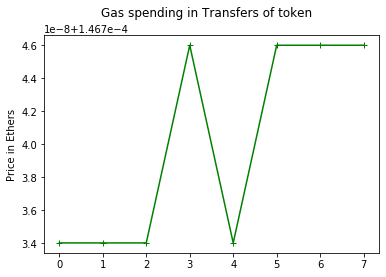

In [46]:
y1 = gas_establishing_connections

fig, ax1 = plt.subplots()
fig.suptitle('Gas spending in Transfers of token')
# plt.ylim(bottom, top) 
# plt.ylim(top =  0.00015)
# plt.ylim(bottom =  0.00013)
ax1.plot(y1, '+-', color='green')
ax1.set_ylabel('Price in Ethers')

plt.show()

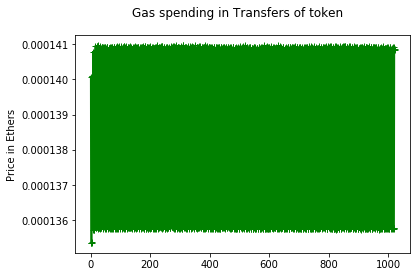

In [47]:
y1 = gas_passingValue

fig, ax1 = plt.subplots()
fig.suptitle('Gas spending in Transfers of token')
# plt.ylim(bottom, top) 
# plt.ylim(top =  0.00015)
# plt.ylim(bottom =  0.00013)
ax1.plot(y1, '+-', color='green')
ax1.set_ylabel('Price in Ethers')

plt.show()

### Ethers Spent (contract deployment, contract call i.e. transactions w.r.t. payload from addresses)

### Total Ethers spent by a GRID node (payload comparision)

### Retrieving Data time (Filters) Focus more "regenerating transaction as per iteration"

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

